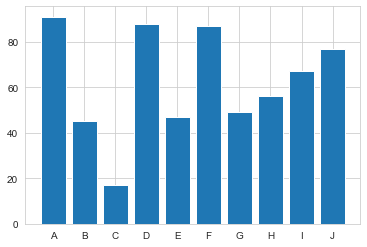

In [73]:
import matplotlib.pyplot as plt
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
x_pos = range(0, 10)
V = [91, 45, 17, 88, 47, 87, 49, 56, 67, 77]
plt.bar(x_pos, V, tick_label = labels)    # グラフを描く    
plt.show()    # 表示する


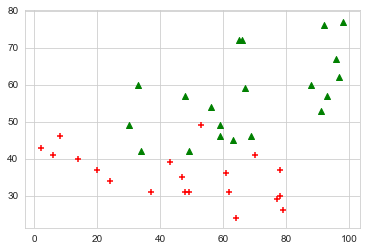

In [74]:
import matplotlib.pyplot as plt
X1 = [79, 49, 24, 61, 37, 47, 70, 53, 48, 20, 2, 64, 77, 78, 78, 8, 6, 14, 62, 43]
Y1 = [26, 31, 34, 36, 31, 35, 41, 49, 31, 37, 43, 24, 29, 37, 30, 46, 41, 40, 31, 39]
X2 = [97, 98, 33, 93, 59, 63, 30, 48, 88, 56, 91, 65, 69, 66, 67, 92, 96, 59, 49, 34]
Y2 = [62, 77, 60, 57, 46, 45, 49, 57, 60, 54, 53, 72, 46, 72, 59, 76, 67, 49, 42, 42]
plt.scatter(X1, Y1, marker = "+", color = "red")    # グラフを描く
plt.scatter(X2, Y2, marker = "^", color = "green")    # グラフを描く
plt.show()    # 表示する


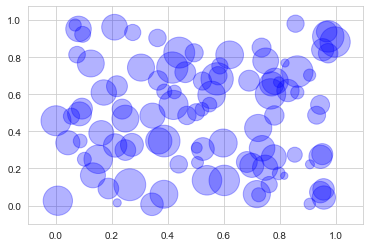

In [75]:
import matplotlib.pyplot as plt
import numpy as np
X, Y = np.random.rand(100), np.random.rand(100)    # ランダムな配列を作る
V = np.random.rand(100)*1000 + 50    # サイズを決めるデータの配列
plt.scatter(X, Y, s = V, c = "b", alpha = 0.3, linewidths = 1, edgecolors = "b")    # グラフを描く
plt.show()    # 表示する


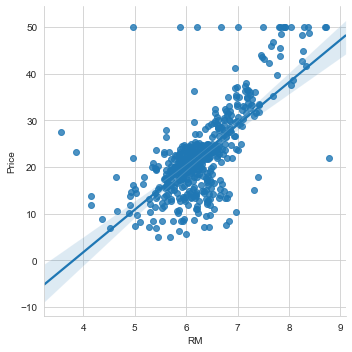

In [76]:
from sklearn import datasets
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
# データセットを読み込む
boston = datasets.load_boston()
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names    # 列名を設定する
boston_df["Price"] = boston.target    # 住宅価格を追加する
# 部屋数と住宅価格から回帰直線を引く
sns.set_style('whitegrid')
sns.lmplot(x = "RM", y = "Price", data = boston_df)
plt.show()

In [77]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
# アヤメのデータセットを読み込む
iris = datasets.load_iris()
X = iris.data
y = iris.target
# データを分割するインデックスを作る
iris_ss = ShuffleSplit(train_size=0.6, test_size=0.4, random_state=0)
train_index, test_index = next(iris_ss.split(X))
# データを分割する
X_train, y_train = X[train_index], y[train_index]    # 訓練データ
X_test, y_test = X[test_index], y[test_index]    # テストデータ
clf = svm.SVC(gamma='auto')    # モデルを作る
clf.fit(X_train, y_train)    # 訓練する
print(clf.score(X_test, y_test))    # 正答率を調べる



0.95


In [91]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import ShuffleSplit
# アヤメのデータセットを読み込む
iris = datasets.load_iris()
X = iris.data
y = iris.target
# データを分割するインデックスを作る
iris_ss = ShuffleSplit(n_splits=1, train_size=0.6, test_size=0.4, random_state=0)
train_index, test_index = next(iris_ss.split(X))
# データを分割する
X_train, y_train = X[train_index], y[train_index]    # 訓練データ
X_test, y_test = X[test_index], y[test_index]    # テストデータ
clf = linear_model.LogisticRegression(solver='lbfgs', multi_class='auto')
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9166666666666666


正答率0.9632721202003339
誤った個数：22
classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.97      1.00      0.98        62
           2       1.00      0.98      0.99        60
           3       0.96      0.81      0.88        62
           4       0.98      0.95      0.97        62
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        61
           7       0.95      1.00      0.98        61
           8       0.89      0.98      0.93        55
           9       0.95      0.97      0.96        58

    accuracy                           0.96       599
   macro avg       0.96      0.96      0.96       599
weighted avg       0.96      0.96      0.96       599

confusion matrix
[[58  0  0  0  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 59  1  0  0  0  0  0  0]
 [ 0  0  0 50  0  2  0  3  7  0]
 [ 0  0  0  0 59  0  0  0  0  3]
 [ 0  

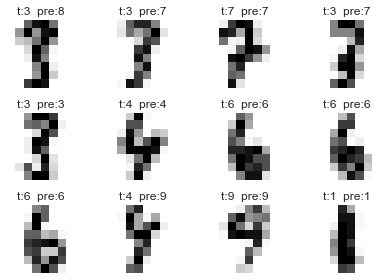

In [92]:
from sklearn import datasets
from sklearn import svm, metrics
import matplotlib.pyplot as plt

# 手書き数字データセットを読み込む
digits = datasets.load_digits()
X = digits.data    # 手書き数字データ
y = digits.target   # ターゲット
n_train = len(X)*2//3 # データの2/3の個数

# 訓練データ
X_train, y_train = X[:n_train], y[:n_train]   # 前半 2/3
# テストデータ
X_test, y_test = X[n_train:], y[n_train:]    # 後半 1/3

# 学習器の作成と学習
clf = svm.SVC(gamma=0.001)    # 学習器
clf.fit(X_train, y_train)     # 訓練データと教師データで学習する

# モデルの学習結果を評価する
accuracy = clf.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = clf.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))
print("confusion matrix")
print(metrics.confusion_matrix(y_test, predicted))

# 画像イメージと分類結果（404〜415の12文字を表示）
imgs_yt_preds = list(zip(digits.images[n_train:], y_test, predicted))
for index, (image, y_t, pred) in enumerate(imgs_yt_preds[404:416]):
    plt.subplot(3, 4, index + 1)    # 3×4で表示する
    plt.axis('off')
    plt.tight_layout() 
    plt.imshow(image, cmap="Greys", interpolation="nearest")
    plt.title(f't:{y_t}  pre:{pred}',  fontsize=12)    # 正解と分類結果
plt.show()


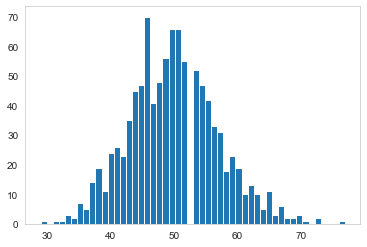

In [93]:
import numpy as np
import matplotlib.pyplot as plt
# ポアソン分布（平均50、1000個）
data = np.random.poisson(lam=50, size=1000)
count, bins_edges, patches = plt.hist(data, bins = 50)    # ヒストグラム
plt.grid()
plt.show()



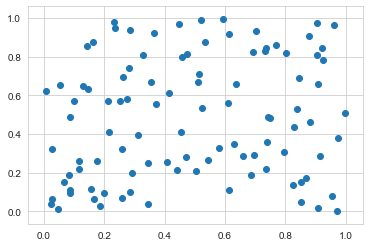

In [94]:
import matplotlib.pyplot as plt
import numpy as np
X = np.random.rand(100)    # 乱数の配列を作る
Y = np.random.rand(100)    # 乱数の配列を作る
plt.scatter(X, Y)    # グラフを描く
plt.show()    # 表示する

正答率0.9632721202003339
誤った個数：22
classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.97      1.00      0.98        62
           2       1.00      0.98      0.99        60
           3       0.96      0.81      0.88        62
           4       0.98      0.95      0.97        62
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        61
           7       0.95      1.00      0.98        61
           8       0.89      0.98      0.93        55
           9       0.95      0.97      0.96        58

    accuracy                           0.96       599
   macro avg       0.96      0.96      0.96       599
weighted avg       0.96      0.96      0.96       599

confusion matrix
[[58  0  0  0  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 59  1  0  0  0  0  0  0]
 [ 0  0  0 50  0  2  0  3  7  0]
 [ 0  0  0  0 59  0  0  0  0  3]
 [ 0  

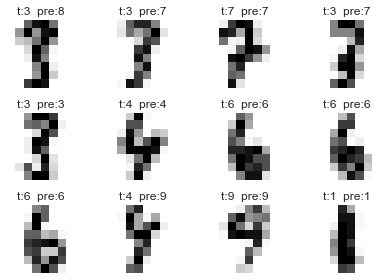

In [95]:
from sklearn import datasets
from sklearn import svm, metrics
import matplotlib.pyplot as plt

# 手書き数字データセットを読み込む
digits = datasets.load_digits()
X = digits.data    # 手書き数字データ
y = digits.target   # ターゲット
n_train = len(X)*2//3 # データの2/3の個数

# 訓練データ
X_train, y_train = X[:n_train], y[:n_train]   # 前半 2/3
# テストデータ
X_test, y_test = X[n_train:], y[n_train:]    # 後半 1/3

# 学習器の作成と学習
clf = svm.SVC(gamma=0.001)    # 学習器
clf.fit(X_train, y_train)     # 訓練データと教師データで学習する

# モデルの学習結果を評価する
accuracy = clf.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = clf.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))
print("confusion matrix")
print(metrics.confusion_matrix(y_test, predicted))

# 画像イメージと分類結果（404〜415の12文字を表示）
imgs_yt_preds = list(zip(digits.images[n_train:], y_test, predicted))
for index, (image, y_t, pred) in enumerate(imgs_yt_preds[404:416]):
    plt.subplot(3, 4, index + 1)    # 3×4で表示する
    plt.axis('off')
    plt.tight_layout() 
    plt.imshow(image, cmap="Greys", interpolation="nearest")
    plt.title(f't:{y_t}  pre:{pred}',  fontsize=12)    # 正解と分類結果
plt.show()


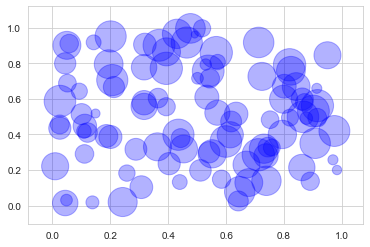

In [96]:
import matplotlib.pyplot as plt
import numpy as np
X, Y = np.random.rand(100), np.random.rand(100)    # ランダムな配列を作る
V = np.random.rand(100)*1000 + 50    # サイズを決めるデータの配列
plt.scatter(X, Y, s = V, c = "b", alpha = 0.3, linewidths = 1, edgecolors = "b")    # グラフを描く
plt.show()    # 表示する
